In [1]:
from pybedtools import BedTool


In [2]:
def intersect_bed_files(bed_file1, bed_file2):
    bed1 = BedTool(bed_file1)
    bed2 = BedTool(bed_file2)

    # Intersect and split regions
    # Retain annotations from bed_file2 for overlapping regions
    merged = bed1.intersect(bed2, wa=True, wb=True)#.saveas("output/temp_intersect.bed")

    # Split non-overlapping regions from bed_file1
    non_overlapping = bed1.subtract(bed2)#.saveas("output/temp_non_overlapping.bed")

    return merged, non_overlapping

In [41]:
def intersect_bed_objects(bed_file1, bed_file2):
    bed1 = bed_file1
    bed2 = bed_file2

    # Intersect and split regions
    # Retain annotations from bed_file2 for overlapping regions
    merged = bed1.intersect(bed2, wa=True, wb=True)#.saveas("output/temp_intersect.bed")

    # Split non-overlapping regions from bed_file1
    non_overlapping = bed1.subtract(bed2)#.saveas("output/temp_non_overlapping.bed")

    return merged, non_overlapping

In [3]:
bed_allpeaks = "/data2st1/junyi/output/cCRE/ALL_sampled_peaks.bed"
bed_encode = "/data2st1/junyi/output/enhancer_m39converted_renamed.bed"

merged, non_overlapping = intersect_bed_files(bed_allpeaks, bed_encode)

In [ ]:
bed_allpeaks

In [7]:
len(merged), len(non_overlapping)

(172839, 545816)

In [11]:
bedall_peaks = BedTool(bed_allpeaks)

In [12]:
len(bedall_peaks)

443155

In [37]:
bed_intron = "/data2st1/junyi/generegion_vM33/intron.bed"

intron, non_intron = intersect_bed_files(bed_allpeaks, bed_intron)

df_intron = intron.to_dataframe().drop_duplicates(subset=['chrom', 'start', 'end'])

num_intron = len(df_intron)

***** WARNING: File /data2st1/junyi/generegion_vM33/intron.bed has inconsistent naming convention for record:
GL456210.1	123906	124786	.	+	ENSMUSG00000079192	ENSMUSG00000079192.3	intron

***** WARNING: File /data2st1/junyi/generegion_vM33/intron.bed has inconsistent naming convention for record:
GL456210.1	123906	124786	.	+	ENSMUSG00000079192	ENSMUSG00000079192.3	intron

***** WARNING: File /data2st1/junyi/generegion_vM33/intron.bed has inconsistent naming convention for record:
GL456210.1	123906	124786	.	+	ENSMUSG00000079192	ENSMUSG00000079192.3	intron

***** WARNING: File /data2st1/junyi/generegion_vM33/intron.bed has inconsistent naming convention for record:
GL456210.1	123906	124786	.	+	ENSMUSG00000079192	ENSMUSG00000079192.3	intron



In [42]:
bed_intron = "/data2st1/junyi/generegion_vM33/exon.bed"
exon = BedTool(bed_intron)
exon, non_ie = intersect_bed_objects(non_intron, exon)


***** WARNING: File /data2st1/junyi/generegion_vM33/exon.bed has inconsistent naming convention for record:
GL456210.1	58594	58882	.	-	ENSMUSG00000079800	ENSMUSG00000079800.3	exon

***** WARNING: File /data2st1/junyi/generegion_vM33/exon.bed has inconsistent naming convention for record:
GL456210.1	58594	58882	.	-	ENSMUSG00000079800	ENSMUSG00000079800.3	exon

***** WARNING: File /data2st1/junyi/generegion_vM33/exon.bed has inconsistent naming convention for record:
GL456210.1	58594	58882	.	-	ENSMUSG00000079800	ENSMUSG00000079800.3	exon

***** WARNING: File /data2st1/junyi/generegion_vM33/exon.bed has inconsistent naming convention for record:
GL456210.1	58594	58882	.	-	ENSMUSG00000079800	ENSMUSG00000079800.3	exon



In [92]:
df_exon = exon.to_dataframe().drop_duplicates(subset=['chrom', 'start', 'end'])
num_exon = len(df_exon)

In [93]:
promoter = BedTool("/data2st1/junyi/generegion_vM33/promoter.bed")
promoter, non_iep = intersect_bed_objects(non_ie, promoter)
df_promoter = promoter.to_dataframe().drop_duplicates(subset=['chrom', 'start', 'end'])
num_promoter = len(df_promoter)

***** WARNING: File /data2st1/junyi/generegion_vM33/promoter.bed has inconsistent naming convention for record:
GL456210.1	10028	11028	.	-	ENSMUSG00000079800	ENSMUSG00000079800.3	promoter

***** WARNING: File /data2st1/junyi/generegion_vM33/promoter.bed has inconsistent naming convention for record:
GL456210.1	10028	11028	.	-	ENSMUSG00000079800	ENSMUSG00000079800.3	promoter

***** WARNING: File /data2st1/junyi/generegion_vM33/promoter.bed has inconsistent naming convention for record:
GL456210.1	10028	11028	.	-	ENSMUSG00000079800	ENSMUSG00000079800.3	promoter

***** WARNING: File /data2st1/junyi/generegion_vM33/promoter.bed has inconsistent naming convention for record:
GL456210.1	10028	11028	.	-	ENSMUSG00000079800	ENSMUSG00000079800.3	promoter



In [94]:
SINES = BedTool("/data2st1/junyi/generegion_vM33/sines.bed")
SINES, non_sines = intersect_bed_files(non_iep, SINES)
df_sines = SINES.to_dataframe().drop_duplicates(subset=['chrom', 'start', 'end'])
num_sines = len(df_sines)

In [95]:
LTRS = BedTool("/data2st1/junyi/generegion_vM33/ltrs.bed")
LTRS, non_LTRS = intersect_bed_files(non_iep, LTRS)
df_ltrs = LTRS.to_dataframe().drop_duplicates(subset=['chrom', 'start', 'end'])
num_ltrs = len(df_ltrs)

In [96]:
LINES = BedTool("/data2st1/junyi/generegion_vM33/lines.bed")
LINES, non_LINES = intersect_bed_files(non_iep, LINES)
df_lines = LINES.to_dataframe().drop_duplicates(subset=['chrom', 'start', 'end'])
num_lines = len(df_lines)


In [97]:
intergenic = '/data2st1/junyi/generegion_vM33/intergenic.bed'
intergenic, non_intergenic = intersect_bed_files(bed_allpeaks, intergenic)
df_intergenic = intergenic.to_dataframe().drop_duplicates(subset=['chrom', 'start', 'end'])
num_intergenic = len(df_intergenic)

***** WARNING: File /data2st1/junyi/generegion_vM33/intergenic.bed has inconsistent naming convention for record:
GL456210.1	58883	108389	.	.	intergenic

***** WARNING: File /data2st1/junyi/generegion_vM33/intergenic.bed has inconsistent naming convention for record:
GL456210.1	58883	108389	.	.	intergenic

***** WARNING: File /data2st1/junyi/generegion_vM33/intergenic.bed has inconsistent naming convention for record:
GL456210.1	58883	108389	.	.	intergenic

***** WARNING: File /data2st1/junyi/generegion_vM33/intergenic.bed has inconsistent naming convention for record:
GL456210.1	58883	108389	.	.	intergenic



In [98]:
other_repeat = '/data2st1/junyi/generegion_vM33/other_repeats.bed'
other_repeat, non_other_repeat = intersect_bed_files(non_iep, other_repeat)
df_other_repeat = other_repeat.to_dataframe().drop_duplicates(subset=['chrom', 'start', 'end'])
num_other_repeat = len(df_other_repeat)

In [99]:
cpgi = '/data2st1/junyi/generegion_vM33/cpg.bed'
cpgi, non_cpgi = intersect_bed_files(bed_allpeaks, cpgi)
df_cpgi = cpgi.to_dataframe().drop_duplicates(subset=['chrom', 'start', 'end'])
num_cpgi = len(df_cpgi)

In [100]:
num_cpgi

19364

In [101]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

data = {'Region': ['Intron', 'Exon', 'Promoter', 'SINES', 'LTRs', 'LINES', 'Intergenic', 'Other Repeats', 'CpG Islands'],
        'Number of Peaks': [num_intron, num_exon, num_promoter, num_sines, num_ltrs, num_lines, num_intergenic, num_other_repeat, num_cpgi]}
df = pd.DataFrame(data)


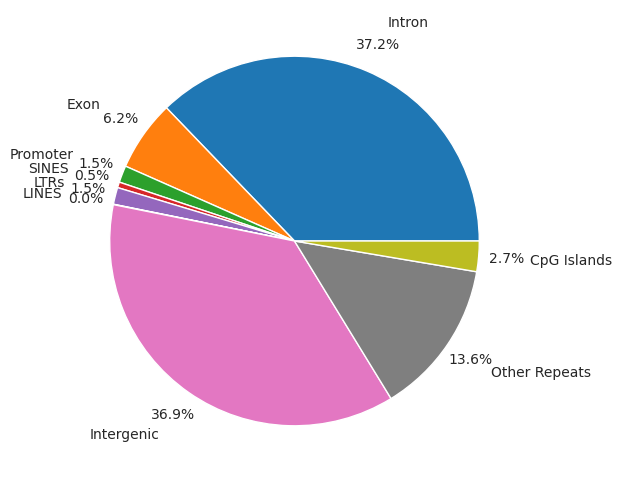

In [114]:
sns.set_style("whitegrid")
plt.figure(figsize=(6,6))
plt.pie(df['Number of Peaks'], labels=df['Region'], autopct='%1.1f%%',pctdistance=1.15,labeldistance=1.28)
plt.show()
